In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from py_cFBA import *

In [16]:
def cFBA_mix(sbml_file, ac, substrate_name, substrate_level):
    # Quotas for the model (min based from Acevedo 2012)
    quotas = [
    #   ['type',     'metabolite', time, value]
        ['equality', 'Acetate',      0,    ac],
        ['equality', 'Acetate',      1,    0],
        ['equality', substrate_name, 0,    substrate_level],
        ['equality', substrate_name, 1,    0],
        ['min',      'Glyc',         0,    0.012],
        ['min',      'PolyP',        0,    0.1],
        ['min',      'PHB',          0,    0.006],
        ['min',      'PH2MV',        0,    0.006],
    ]

    # Generate the Linear Programming (LP) model components for cFBA
    cons, Mk, imbalanced_mets, nm, nr, nt = generate_LP_cFBA(sbml_file, quotas, dt)

    # Find the optimal alpha value
    alpha, prob = find_alpha(cons, Mk, imbalanced_mets)

    # Retrieve the solution (fluxes, amounts, and time points)
    fluxes, amounts, t = get_fluxes_amounts(sbml_file, prob, dt)

    # Store the solution of fluxes and amounts
    solution = {
        'alpha': alpha,
        'fluxes': fluxes,
        'amounts': amounts,
        'time_points': t
    }

    return solution

def simulation_additive(file_name, substrate_name, dor_S):
    sol = [] # empty list to store solutions
    
    dor_ac = 8 # e/mol

    # Based on Acevedo 2012
    ac_load = 0.087
    cod_load = ac_load * dor_ac   # mol ac / cmolx  ->  e- mol / cmolx
    S_load = cod_load / dor_S

    ac = [ac_load, 0, ac_load]
    subs = [0, S_load, S_load]
    
    growth = np.zeros(np.size(ac))
    for i in range(3):
        solution = cFBA_mix(file_name, ac[i], substrate_name, subs[i])
        growth[i] = solution['alpha']
        
    return growth

def plot_growth(growth):
    # Variables for summative effect
    x_sum = [1, 2, 3]
    y1_sum = [
        0,
        growth[0],             # Growth on acetate
        growth[0] + growth[1], # Additive growth 
    ]
    
    y2_sum = [
        0,
        growth[1],             # Growth on substrate
        growth[0] + growth[1], # Additive growth 
    ]
    
    # Variables for combinatorial effect
    x_comb = [2, 3]
    y1_comb = [
        growth[0],             # Growth on acetate
        growth[2]              # Combinatorial growth
    ]
    
    y2_comb = [
        growth[1],             # Growth on substrate
        growth[2]              # Combinatorial growth
    ]

    
    # Make plot
    plt.figure(figsize=[5, 3])
    plt.plot(x_sum, y1_sum, '-o', color = 'black')
    plt.plot(x_sum, y2_sum, '-o', color = 'black')
    plt.plot(x_comb, y1_comb, '--', color = 'grey')
    plt.plot(x_comb, y2_comb, '--', color = 'grey')

0.06 min
0.06 min
0.06 min


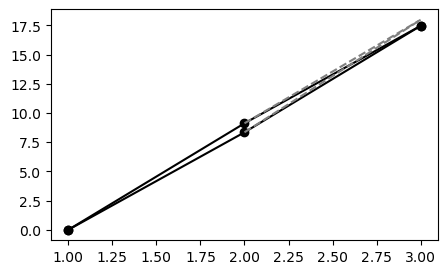

In [17]:
# Simulate substrate and get alpha and perc_substrate values
dt = 1
file_name = 'cFBA_base_aspartate.xml'
substrate_name = 'Asp_ext'
dor_S = 12

growth = simulation_additive(file_name, substrate_name, dor_S)
growth_perc = (growth - 1)*100
plot_growth(growth_perc)

0.05 min
0.05 min
0.05 min


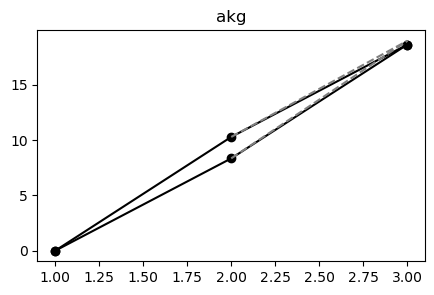

0.05 min
0.06 min
0.06 min


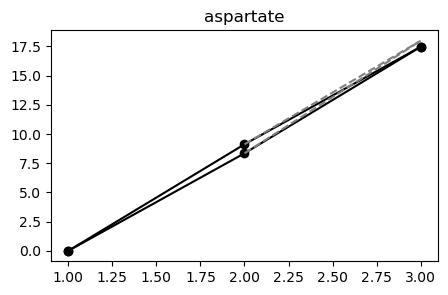

0.06 min
0.05 min
0.06 min


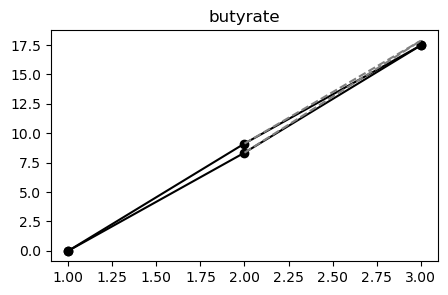

0.06 min
0.05 min
0.05 min


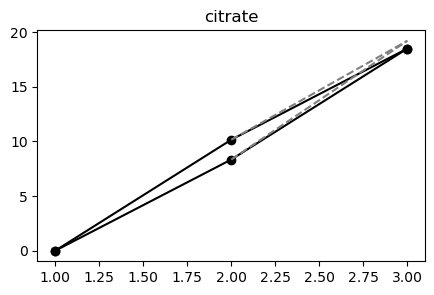

0.07 min
0.05 min
0.06 min


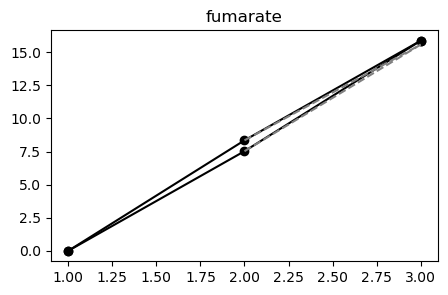

0.06 min
0.05 min
0.06 min


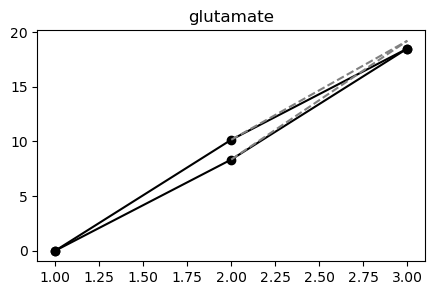

0.06 min
0.06 min
0.05 min


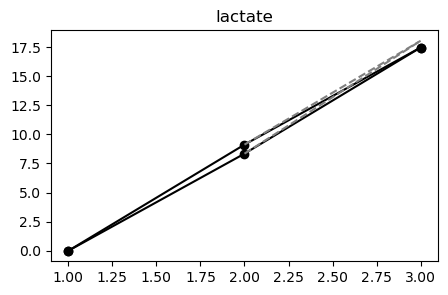

0.06 min
0.06 min
0.06 min


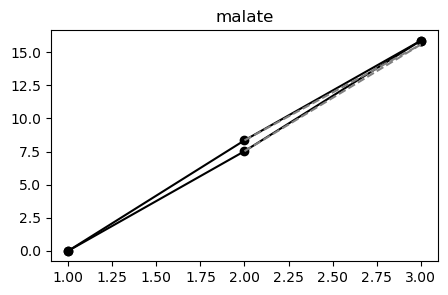

0.06 min
0.06 min
0.06 min


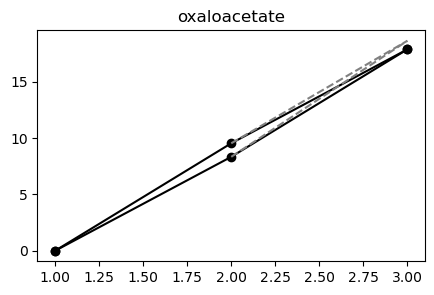

0.06 min
0.05 min
0.06 min


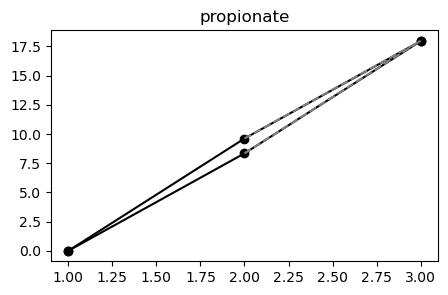

0.06 min
0.06 min
0.05 min


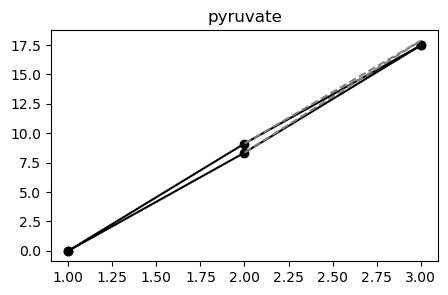

0.06 min
0.05 min
0.06 min


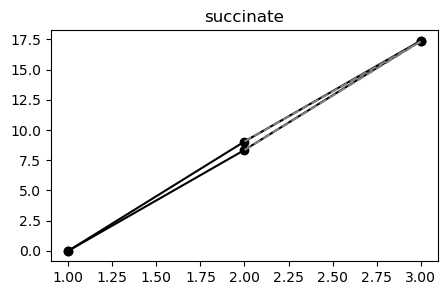

In [21]:
# Organize input variables in a dictionary
substrates_info = {
    'akg': {'file': 'cFBA_base_akg.xml', 'dor': 16, 'met_name': 'S_ext'},
    'aspartate': {'file': 'cFBA_base_aspartate.xml', 'dor': 12, 'met_name': 'Asp_ext'},
    'butyrate': {'file': 'cFBA_base_butyrate.xml', 'dor': 20, 'met_name': 'S_ext'},
    'citrate': {'file': 'cFBA_base_citrate.xml', 'dor': 18, 'met_name': 'S_ext'},
    'fumarate': {'file': 'cFBA_base_fumarate.xml', 'dor': 12, 'met_name': 'S_ext'},
    'glutamate': {'file': 'cFBA_base_glutamate.xml', 'dor': 18, 'met_name': 'Glut_ext'},
    'lactate': {'file': 'cFBA_base_lactate.xml', 'dor': 12, 'met_name': 'S_ext'},
    'malate': {'file': 'cFBA_base_malate.xml', 'dor': 12, 'met_name': 'S_ext'},
    'oxaloacetate': {'file': 'cFBA_base_oxaloacetate.xml', 'dor': 10, 'met_name': 'S_ext'},
    'propionate': {'file': 'cFBA_base_propionate.xml', 'dor': 14, 'met_name': 'Prop_ext'},
    'pyruvate': {'file': 'cFBA_base_pyruvate.xml', 'dor': 10, 'met_name': 'S_ext'},
    'succinate': {'file': 'cFBA_base_succinate.xml', 'dor': 14, 'met_name': 'S_ext'},
}

# Store results in a dictionary
results = {}

# Simulate each substrate and store the results
dt = 1

for substrate, info in substrates_info.items():
    file_name = info['file']
    dor_S = info['dor']
    
    growth = simulation_additive(file_name, info['met_name'], dor_S)
    growth_perc = (growth - 1)*100
    plot_growth(growth_perc)
    plt.title(substrate)
    plt.show()
